In [1242]:
def grid_dicto_to_df_list(grid_list):
    list_to_df = []
    non_metrics = ['proba_outputs', 'actual_classes', 'proba_outputs', 'actual_classes', 'test_proba', 'test_actual_classes']
    for dict_hyper in grid_list:
        dict_to_df = {}
        # print(dict_hyper)
        for val in dict_hyper.values():
            for item in val.items():
                if type(item[1]) != dict:
                    dict_to_df[item[0]] = item[1]
                else:
                    dictionary_results = item[1]
                    for item in dictionary_results.items(): 
                        if item[0] not in non_metrics:
                            dict_to_df[item[0]] = item[1]
        list_to_df.append(dict_to_df)
    return list_to_df

# Initial grid analysis of INDIVIDUAL DETERMINANT models

In [1243]:
import pandas as pd 
import json
import pprint

In [1244]:
with open("grid_results_determinants_individual.json") as f:
    grids = json.load(f)

In [1245]:
len(grids)

9

In [1246]:
list_to_df = grid_dicto_to_df_list(grids)

In [1247]:
df = pd.DataFrame(list_to_df)

In [1248]:
# pprint.pprint(list(df.columns))

In [1249]:
df.head()

,max-len,learning_rate,batch_size,num_train_epochs,n_epochs,train_loss_epoch_1,valid_loss_epoch_1,f1_epoch_1,accuracy_epoch_1,roc_auc_epoch_1,...,accuracy_epoch_14,roc_auc_epoch_14,hamming_epoch_14,proba_outputs_epoch_14,actual_classes_epoch_14,test_loss,test_f1,test_roc_auc,test_hamming,test_accuracy
0,128,0.00002,8,14,15,0.012611,0.070722,0.315789,0.250000,0.602192,...,0.333333,0.634606,0.061728,"[[[0.02805124595761299, 0.01598079316318035, 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.069446,0.285714,0.598310,0.069444,0.25
1,128,0.00002,12,14,15,0.020609,0.143677,0.346667,0.361111,0.638260,...,0.277778,0.614097,0.058642,"[[[0.056838832795619965, 0.040381889790296555,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.097712,0.303030,0.601277,0.063889,0.25
2,128,0.00002,16,14,15,0.027929,0.154011,0.323529,0.277778,0.618576,...,0.222222,0.590288,0.061728,"[[[0.05006634071469307, 0.04769202694296837, 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.113145,0.363636,0.624500,0.058333,0.30
3,128,0.00003,8,14,15,0.010827,0.056068,0.000000,0.000000,0.500000,...,0.333333,0.661716,0.052469,"[[[0.015534669160842896, 0.009569521993398666,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.064070,0.363636,0.624500,0.058333,0.25
4,128,0.00003,12,14,15,0.018558,0.113339,0.000000,0.000000,0.500000,...,0.361111,0.660891,0.054012,"[[[0.022346261888742447, 0.015515814535319805,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.093663,0.342857,0.621533,0.063889,0.25


In [1250]:
def get_best_scores(df):

    cols_min = [ "train_loss_epoch", "valid_loss_epoch", "hamming_epoch"]

    for col in cols_min:
        filter_df = df.filter(regex=(col))
        # print(filter_df)
        minimum = filter_df.min(axis=1)
        
        name = col.split("epoch")[0]
        name_col = "best_{}".format(name)
        # print(minimum)
        df[name_col] = minimum
        
    cols_max = ["f1_epoch", "accuracy_epoch", "roc_auc_epoch"]
    
    for col in cols_max:
        filter_df = df.filter(regex=(col))
        max_ = filter_df.max(axis=1)
        name = col.split("epoch")[0]
        name_col = "best_{}".format(name)
        df[name_col] = max_
    
    return df

In [1251]:
df_bests = get_best_scores(df)

In [1252]:
names_cols = [col for col in df.columns if "best_" in col and "roc" not in col]

In [1253]:
names_cols

['best_train_loss_',
 'best_valid_loss_',
 'best_hamming_',
 'best_f1_',
 'best_accuracy_']

In [1254]:
filter_columns = ["learning_rate", "batch_size", "test_loss", "test_f1", "test_hamming"] + names_cols

## Comparing model performance

In [1255]:
df_bests[filter_columns].sort_values(["best_valid_loss_"], ascending=True)

,learning_rate,batch_size,test_loss,test_f1,test_hamming,best_train_loss_,best_valid_loss_,best_hamming_,best_f1_,best_accuracy_
3,0.00003,8,0.064070,0.363636,0.058333,0.002068,0.036345,0.047840,0.523077,0.388889
6,0.00005,8,0.071454,0.315789,0.072222,0.001423,0.037590,0.049383,0.555556,0.444444
0,0.00002,8,0.069446,0.285714,0.069444,0.003601,0.038938,0.055556,0.375000,0.333333
4,0.00003,12,0.093663,0.342857,0.063889,0.004413,0.054979,0.052469,0.444444,0.361111
7,0.00005,12,0.102144,0.333333,0.066667,0.003327,0.056445,0.052469,0.484848,0.361111
1,0.00002,12,0.097712,0.303030,0.063889,0.006030,0.058668,0.054012,0.385965,0.361111
8,0.00005,16,0.118486,0.076923,0.066667,0.005776,0.070371,0.054012,0.437500,0.333333
5,0.00003,16,0.116265,0.363636,0.058333,0.006200,0.071356,0.054012,0.366667,0.305556
2,0.00002,16,0.113145,0.363636,0.058333,0.007666,0.074243,0.057099,0.372881,0.305556


## Evaluating hyperparameters

In [1256]:
df_bests.pivot_table(["best_train_loss_", "best_valid_loss_"], index = "learning_rate", columns="batch_size")

best_train_loss_                     best_valid_loss_            \
batch_size                  8         12        16               8         12   
learning_rate                                                                   
0.00002               0.003601  0.006030  0.007666         0.038938  0.058668   
0.00003               0.002068  0.004413  0.006200         0.036345  0.054979   
0.00005               0.001423  0.003327  0.005776         0.037590  0.056445   

                         
batch_size           16  
learning_rate            
0.00002        0.074243  
0.00003        0.071356  
0.00005        0.070371

If we want to keep the training shorter, we can go for learning rates of 3-e5 and 3-e5 and batches of 8.

<!-- We can see that generally the lower the batch size the faster a model will learn and the better a model will perform.

We can scratch bath size 64 since we would need a higher learning rate and we may lose control of the pace of learning.  -->

In [1257]:
df_bests.pivot_table(["best_train_loss_", "best_valid_loss_", "best_hamming_"], index = "learning_rate", columns="batch_size")

#  Hamming loss is the fraction of labels that are incorrectly predicted

best_hamming_                     best_train_loss_            \
batch_size               8         12        16               8         12   
learning_rate                                                                
0.00002            0.055556  0.054012  0.057099         0.003601  0.006030   
0.00003            0.047840  0.052469  0.054012         0.002068  0.004413   
0.00005            0.049383  0.052469  0.054012         0.001423  0.003327   

                        best_valid_loss_                      
batch_size           16               8         12        16  
learning_rate                                                 
0.00002        0.007666         0.038938  0.058668  0.074243  
0.00003        0.006200         0.036345  0.054979  0.071356  
0.00005        0.005776         0.037590  0.056445  0.070371

## Visualizing the candidate models

In [1258]:
df

,max-len,learning_rate,batch_size,num_train_epochs,n_epochs,train_loss_epoch_1,valid_loss_epoch_1,f1_epoch_1,accuracy_epoch_1,roc_auc_epoch_1,...,test_f1,test_roc_auc,test_hamming,test_accuracy,best_train_loss_,best_valid_loss_,best_hamming_,best_f1_,best_accuracy_,best_roc_auc_
0,128,0.00002,8,14,15,0.012611,0.070722,0.315789,0.250000,0.602192,...,0.285714,0.598310,0.069444,0.25,0.003601,0.038938,0.055556,0.375000,0.333333,0.634606
1,128,0.00002,12,14,15,0.020609,0.143677,0.346667,0.361111,0.638260,...,0.303030,0.601277,0.063889,0.25,0.006030,0.058668,0.054012,0.385965,0.361111,0.638260
2,128,0.00002,16,14,15,0.027929,0.154011,0.323529,0.277778,0.618576,...,0.363636,0.624500,0.058333,0.30,0.007666,0.074243,0.057099,0.372881,0.305556,0.626002
3,128,0.00003,8,14,15,0.010827,0.056068,0.000000,0.000000,0.500000,...,0.363636,0.624500,0.058333,0.25,0.002068,0.036345,0.047840,0.523077,0.388889,0.697430
4,128,0.00003,12,14,15,0.018558,0.113339,0.000000,0.000000,0.500000,...,0.342857,0.621533,0.063889,0.25,0.004413,0.054979,0.052469,0.444444,0.361111,0.660891
5,128,0.00003,16,14,15,0.023656,0.121060,0.044444,0.027778,0.510255,...,0.363636,0.624500,0.058333,0.25,0.006200,0.071356,0.054012,0.366667,0.305556,0.625177
6,128,0.00005,8,14,15,0.009773,0.049536,0.000000,0.000000,0.500000,...,0.315789,0.617082,0.072222,0.25,0.001423,0.037590,0.049383,0.555556,0.444444,0.729844
7,128,0.00005,12,14,15,0.017006,0.090202,0.000000,0.000000,0.500000,...,0.333333,0.620049,0.066667,0.25,0.003327,0.056445,0.052469,0.484848,0.361111,0.683876
8,128,0.00005,16,14,15,0.025054,0.113578,0.170213,0.111111,0.546794,...,0.076923,0.518772,0.066667,0.05,0.005776,0.070371,0.054012,0.437500,0.333333,0.660066


In [1259]:
model_5_batch_8 = df.iloc[6]
model_3_batch_8 = df.iloc[3]

In [1260]:
model_3_batch_8.keys()

Index(['max-len', 'learning_rate', 'batch_size', 'num_train_epochs',
       'n_epochs', 'train_loss_epoch_1', 'valid_loss_epoch_1', 'f1_epoch_1',
       'accuracy_epoch_1', 'roc_auc_epoch_1',
       ...
       'test_f1', 'test_roc_auc', 'test_hamming', 'test_accuracy',
       'best_train_loss_', 'best_valid_loss_', 'best_hamming_', 'best_f1_',
       'best_accuracy_', 'best_roc_auc_'],
      dtype='object', length=135)

Little function to get the info that we want to plot

In [1261]:
def get_train_val_metric_df(model):
    
    """Turn a row into a more easily plot-able df 
    
    """
    
    train_loss = [model[col] for col in model.keys() if "train_loss_" in str(col) and "best" not in str(col)]    
    valid_loss = [model[col] for col in model.keys() if "valid_loss_" in str(col) and "best" not in str(col)]
    metric = [model[col] for col in model.keys() if "hamming_epoch" in str(col) and "best" not in str(col)]
    epochs = [n for n in range(1,15)]

    train_df = pd.DataFrame(train_loss, columns=["train_loss"], index=epochs)
    val_df = pd.DataFrame(valid_loss, columns=["valid_loss"], index=epochs)
    metric_df = pd.DataFrame(metric, columns=["hamming"], index=epochs)
    epochs_df = pd.DataFrame(epochs, columns=["epoch"], index=epochs)
    
    df_evaluate = pd.concat([train_df, val_df, metric_df, epochs_df], axis=1)
    
    return df_evaluate

In [1262]:
df_model_5_batch_8 = get_train_val_metric_df(model_5_batch_8)
df_model_3_batch_8 = get_train_val_metric_df(model_3_batch_8)

#### Plots

In [1263]:
import seaborn as sns 
import matplotlib.pyplot as plt

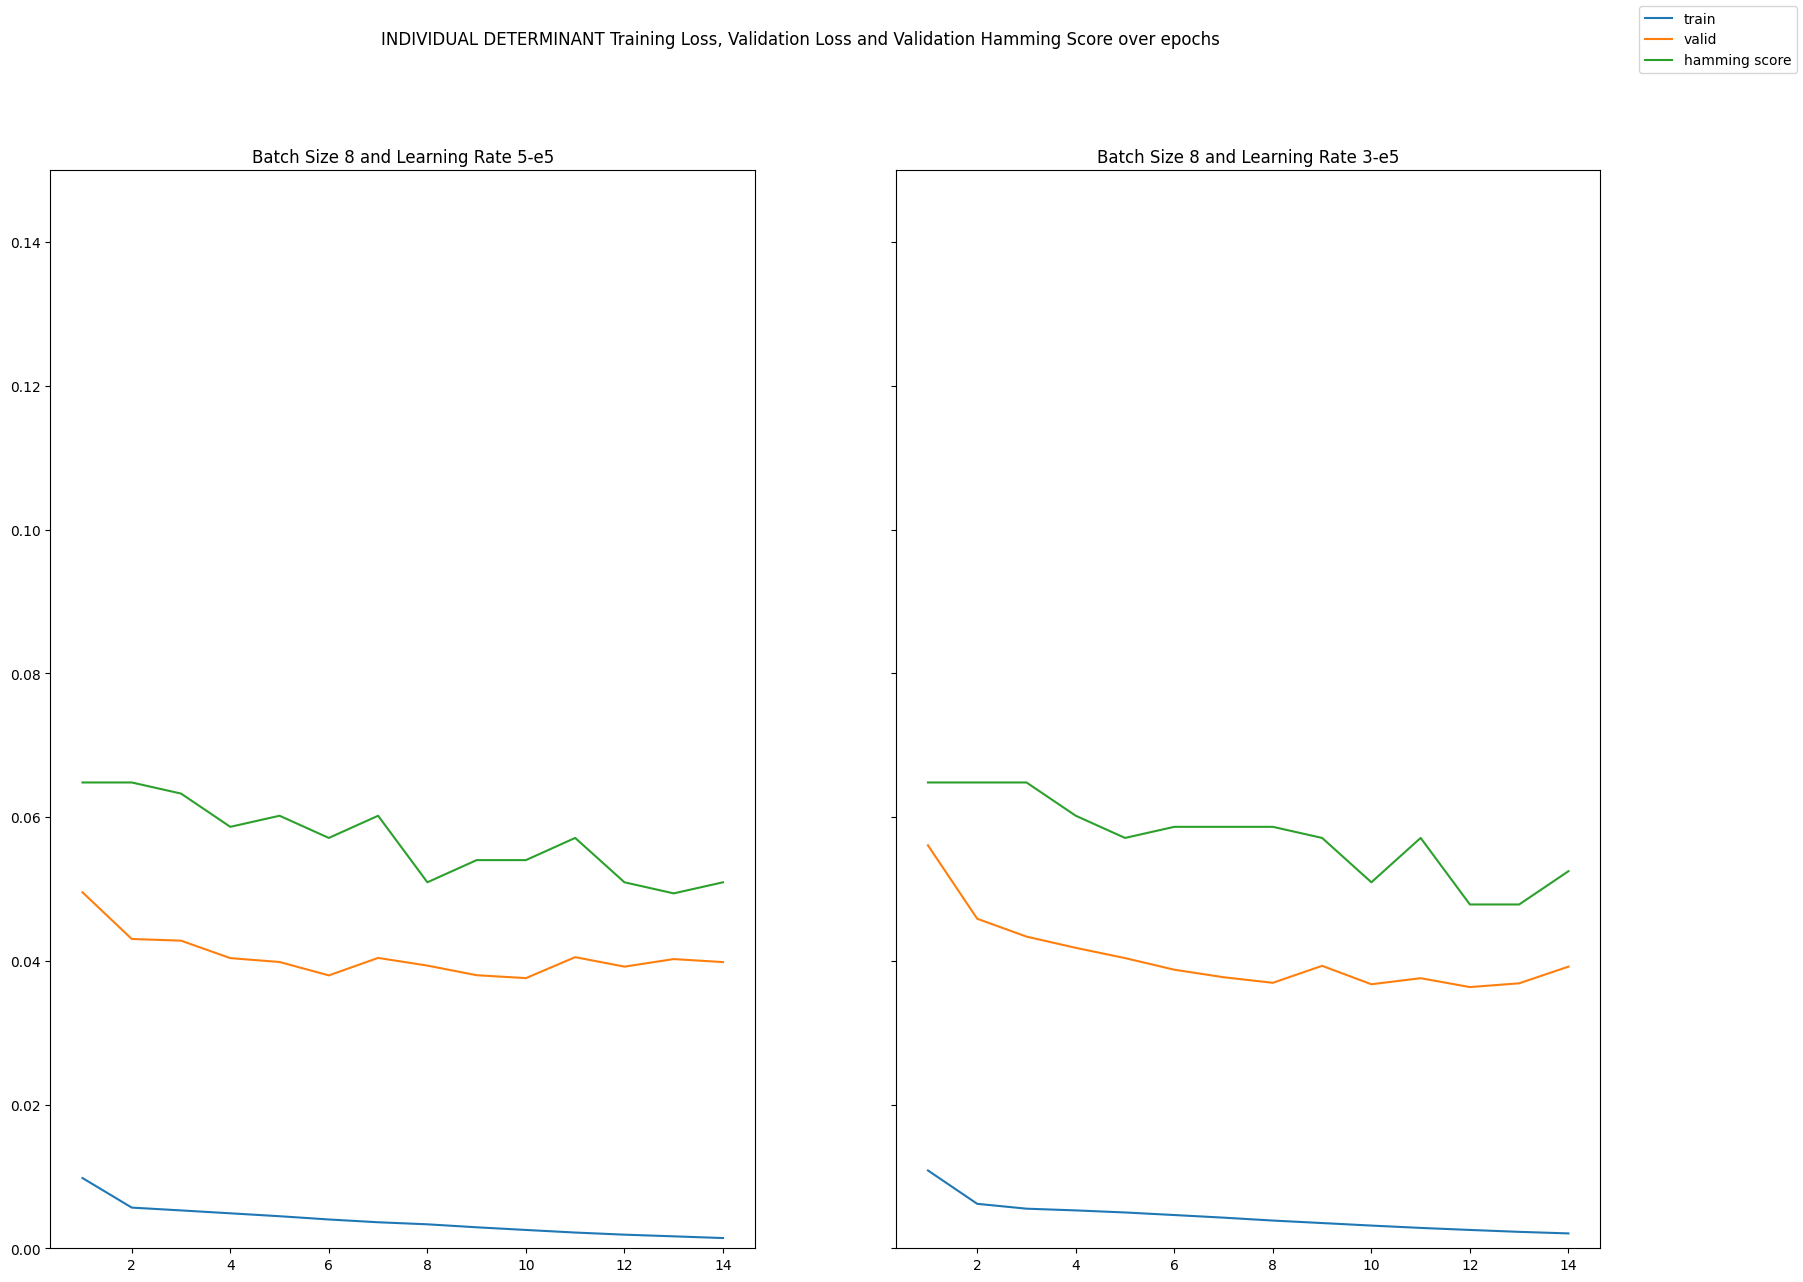

In [1264]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)

fig.set_figheight(14)
fig.set_figwidth(20)
fig.suptitle("INDIVIDUAL DETERMINANT Training Loss, Validation Loss and Validation Hamming Score over epochs")

ax[0].set_ylim(0,0.15)

ax[0].title.set_text("Batch Size 8 and Learning Rate 5-e5")
ax[0].plot(df_model_5_batch_8.index, df_model_5_batch_8["train_loss"], label="train")
ax[0].plot(df_model_5_batch_8.index, df_model_5_batch_8["valid_loss"], label="valid")
ax[0].plot(df_model_5_batch_8.index, df_model_5_batch_8["hamming"], label="hamming score")

ax[1].set_ylim(0,0.15)

ax[1].title.set_text("Batch Size 8 and Learning Rate 3-e5")
ax[1].plot(df_model_3_batch_8.index, df_model_3_batch_8["train_loss"])
ax[1].plot(df_model_3_batch_8.index, df_model_3_batch_8["valid_loss"])
ax[1].plot(df_model_3_batch_8.index, df_model_3_batch_8["hamming"])

fig.legend()
plt.show()

# Initial grid analysis of INDIVIDUAL CONTENT models

In [1265]:
with open("grid_results_contents_individual.json") as f:
    grids = json.load(f)

In [1266]:
len(grids)

18

In [1267]:
grids = grids[-9:]
len(grids)

9

In [1268]:
list_to_df = grid_dicto_to_df_list(grids)

In [1269]:
df = pd.DataFrame(list_to_df)

In [1270]:
df.columns

Index(['max-len', 'learning_rate', 'batch_size', 'num_train_epochs',
       'n_epochs', 'train_loss_epoch_1', 'valid_loss_epoch_1', 'f1_epoch_1',
       'accuracy_epoch_1', 'roc_auc_epoch_1',
       ...
       'accuracy_epoch_14', 'roc_auc_epoch_14', 'hamming_epoch_14',
       'proba_outputs_epoch_14', 'actual_classes_epoch_14', 'test_loss',
       'test_f1', 'test_roc_auc', 'test_hamming', 'test_accuracy'],
      dtype='object', length=129)

In [1271]:
df.head()

,max-len,learning_rate,batch_size,num_train_epochs,n_epochs,train_loss_epoch_1,valid_loss_epoch_1,f1_epoch_1,accuracy_epoch_1,roc_auc_epoch_1,...,accuracy_epoch_14,roc_auc_epoch_14,hamming_epoch_14,proba_outputs_epoch_14,actual_classes_epoch_14,test_loss,test_f1,test_roc_auc,test_hamming,test_accuracy
0,128,0.00002,8,14,15,0.013059,0.060024,0.000000,0.00000,0.500000,...,0.170732,0.583691,0.037940,"[[[0.045712102204561234, 0.03578242287039757, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.041735,0.375000,0.623325,0.032206,0.217391
1,128,0.00002,12,14,15,0.022386,0.118099,0.087912,0.04878,0.523685,...,0.121951,0.562886,0.038844,"[[[0.04294946789741516, 0.03628834709525108, 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.066843,0.352941,0.621650,0.035427,0.217391
2,128,0.00002,16,14,15,0.028416,0.150349,0.000000,0.00000,0.499057,...,0.073171,0.530971,0.041554,"[[[0.06074479967355728, 0.03640878200531006, 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.070685,0.333333,0.603329,0.032206,0.173913
3,128,0.00003,8,14,15,0.012464,0.050725,0.000000,0.00000,0.500000,...,0.146341,0.583691,0.037940,"[[[0.017957378178834915, 0.01750374212861061, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.033259,0.457143,0.664154,0.030596,0.304348
4,128,0.00003,12,14,15,0.020290,0.095651,0.000000,0.00000,0.500000,...,0.121951,0.563358,0.037940,"[[[0.04086542874574661, 0.03246527910232544, 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.059140,0.437500,0.644996,0.028986,0.260870


In [1272]:
df_bests = get_best_scores(df)

## Comparing model performance

In [1273]:
df_bests[filter_columns].sort_values("test_loss", ascending=True)

,learning_rate,batch_size,test_loss,test_f1,test_hamming,best_train_loss_,best_valid_loss_,best_hamming_,best_f1_,best_accuracy_
6,0.00005,8,0.029175,0.577778,0.030596,0.001978,0.017131,0.029810,0.535211,0.390244
3,0.00003,8,0.033259,0.457143,0.030596,0.002871,0.020008,0.035230,0.338983,0.195122
0,0.00002,8,0.041735,0.375000,0.032206,0.003716,0.023577,0.037940,0.275862,0.170732
7,0.00005,12,0.042689,0.666667,0.022544,0.003703,0.028062,0.032520,0.437500,0.268293
8,0.00005,16,0.048579,0.631579,0.022544,0.005484,0.040583,0.029810,0.492308,0.317073
4,0.00003,12,0.059140,0.437500,0.028986,0.005291,0.035016,0.037940,0.250000,0.146341
1,0.00002,12,0.066843,0.352941,0.035427,0.005903,0.038378,0.038844,0.218182,0.121951
5,0.00003,16,0.069847,0.333333,0.032206,0.008575,0.051646,0.042457,0.000000,0.000000
2,0.00002,16,0.070685,0.333333,0.032206,0.008648,0.051685,0.040650,0.115385,0.073171


## Evaluating hyperparameters


In [1274]:
df_bests.pivot_table(["best_train_loss_", "best_valid_loss_"], index = "learning_rate", columns="batch_size")

best_train_loss_                     best_valid_loss_            \
batch_size                  8         12        16               8         12   
learning_rate                                                                   
0.00002               0.003716  0.005903  0.008648         0.023577  0.038378   
0.00003               0.002871  0.005291  0.008575         0.020008  0.035016   
0.00005               0.001978  0.003703  0.005484         0.017131  0.028062   

                         
batch_size           16  
learning_rate            
0.00002        0.051685  
0.00003        0.051646  
0.00005        0.040583

Learning rate 5-e5 with batches of 8 or 12 seem to be the best ones for these models

In [1275]:
df.pivot_table(["best_train_loss_", "best_valid_loss_", "val_hamming"], index = "learning_rate", columns="batch_size")


best_train_loss_                     best_valid_loss_            \
batch_size                  8         12        16               8         12   
learning_rate                                                                   
0.00002               0.003716  0.005903  0.008648         0.023577  0.038378   
0.00003               0.002871  0.005291  0.008575         0.020008  0.035016   
0.00005               0.001978  0.003703  0.005484         0.017131  0.028062   

                        val_hamming                      
batch_size           16          8         12        16  
learning_rate                                            
0.00002        0.051685     0.03794  0.038844  0.041554  
0.00003        0.051646     0.03794  0.037940  0.042457  
0.00005        0.040583     0.02981  0.032520  0.029810

## Visualizing the candidate models

In [1276]:
model_5_batch_8 = df.iloc[6]
model_5_batch_12 = df.iloc[7]

In [1277]:
df_model_5_batch_8 = get_train_val_metric_df(model_5_batch_8)
df_model_5_batch_12 = get_train_val_metric_df(model_5_batch_12)

#### Plots

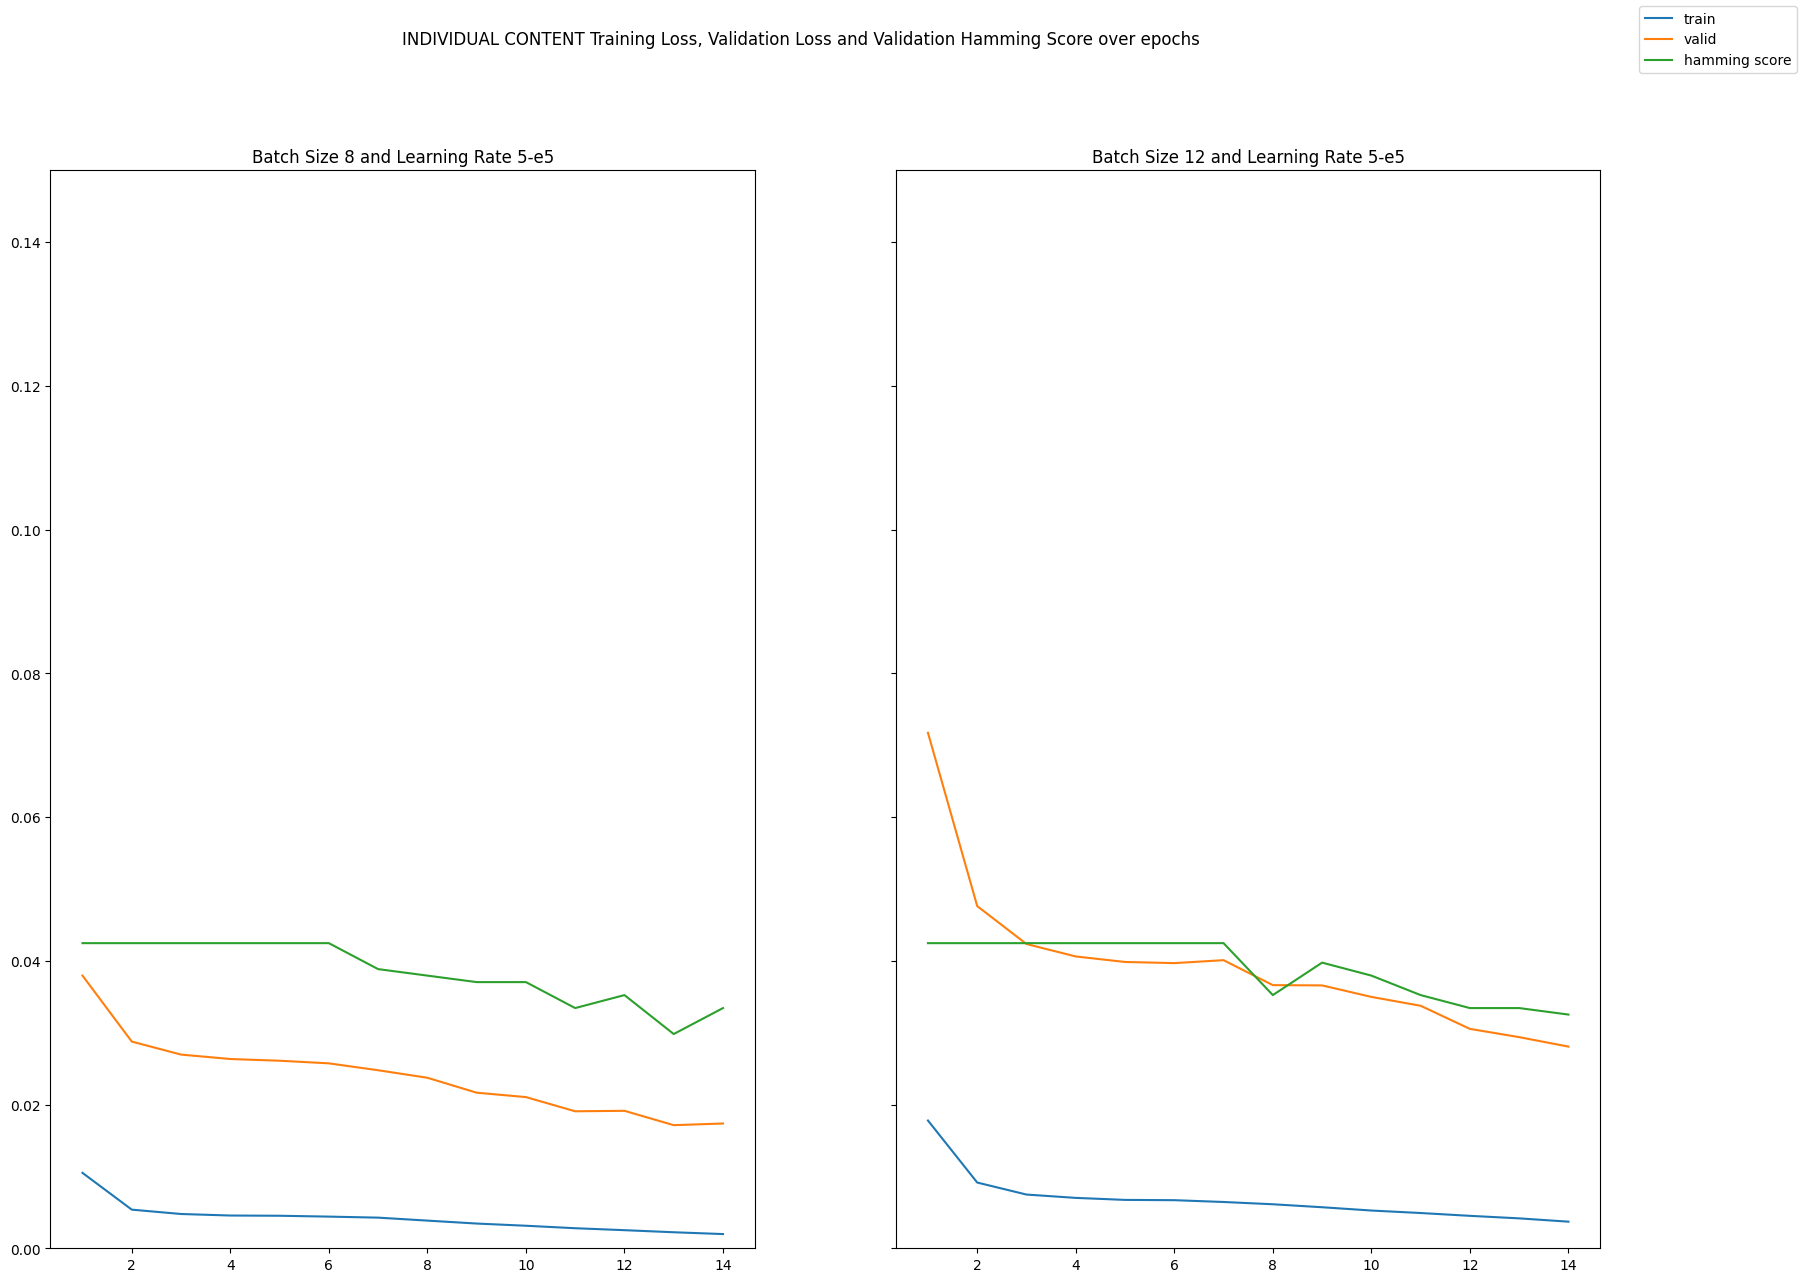

In [1278]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)

fig.set_figheight(14)
fig.set_figwidth(20)
fig.suptitle("INDIVIDUAL CONTENT Training Loss, Validation Loss and Validation Hamming Score over epochs")

ax[0].set_ylim(0, 0.15)

ax[0].title.set_text("Batch Size 8 and Learning Rate 5-e5")
ax[0].plot(df_model_5_batch_8.index, df_model_5_batch_8["train_loss"], label="train")
ax[0].plot(df_model_5_batch_8.index, df_model_5_batch_8["valid_loss"], label="valid")
ax[0].plot(df_model_5_batch_8.index, df_model_5_batch_8["hamming"], label="hamming score")

ax[1].set_ylim(0, 0.15)

ax[1].title.set_text("Batch Size 12 and Learning Rate 5-e5")
ax[1].plot(df_model_5_batch_12.index, df_model_5_batch_12["train_loss"])
ax[1].plot(df_model_5_batch_12.index, df_model_5_batch_12["valid_loss"])
ax[1].plot(df_model_5_batch_12.index, df_model_5_batch_12["hamming"])

fig.legend()
plt.show()

# Initial grid analysis of MACRO DETERMINANT models

In [1279]:
with open("grid_results_determinants_macro.json") as f:
    grids = json.load(f)
    
grids = grids[-9:]

In [1280]:
list_to_df = grid_dicto_to_df_list(grids)

In [1281]:
df = pd.DataFrame(list_to_df)

In [1282]:
# df.columns

In [1283]:
df.head()

,max-len,learning_rate,batch_size,num_train_epochs,n_epochs,train_loss_epoch_1,valid_loss_epoch_1,f1_epoch_1,accuracy_epoch_1,roc_auc_epoch_1,...,accuracy_epoch_14,roc_auc_epoch_14,hamming_epoch_14,proba_outputs_epoch_14,actual_classes_epoch_14,test_loss,test_f1,test_roc_auc,test_hamming,test_accuracy
0,128,0.00002,8,14,15,0.014829,0.106830,0.120000,0.055556,0.523061,...,0.500000,0.754679,0.150000,"[[[0.19750072062015533, 0.010183245874941349, ...","[[0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1....",0.311415,0.511628,0.671966,0.233333,0.388889
1,128,0.00002,12,14,15,0.021178,0.178121,0.043478,0.000000,0.507687,...,0.583333,0.800134,0.127778,"[[[0.48576849699020386, 0.015220322646200657, ...","[[0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1....",0.396041,0.380952,0.591823,0.288889,0.277778
2,128,0.00002,16,14,15,0.029140,0.180109,0.044444,0.027778,0.511364,...,0.500000,0.758690,0.155556,"[[[0.2876509726047516, 0.015411117114126682, 0...","[[0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1....",0.440892,0.500000,0.663855,0.266667,0.333333
3,128,0.00003,8,14,15,0.013780,0.102571,0.044444,0.027778,0.511364,...,0.444444,0.743984,0.177778,"[[[0.038321103900671005, 0.002660775789991021,...","[[0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1....",0.256143,0.590909,0.722907,0.200000,0.388889
4,128,0.00003,12,14,15,0.020086,0.164308,0.000000,0.000000,0.500000,...,0.472222,0.751337,0.166667,"[[[0.06443574279546738, 0.006163878366351128, ...","[[0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1....",0.420646,0.380952,0.591823,0.288889,0.277778


In [1284]:
df_best = get_best_scores(df)

## Comparing model performance

In [1285]:
df_best[filter_columns].sort_values(["test_loss"], ascending=True)

,learning_rate,batch_size,test_loss,test_f1,test_hamming,best_train_loss_,best_valid_loss_,best_hamming_,best_f1_,best_accuracy_
3,0.00003,8,0.256143,0.590909,0.200000,0.000648,0.081434,0.144444,0.675000,0.472222
0,0.00002,8,0.311415,0.511628,0.233333,0.001641,0.085334,0.144444,0.666667,0.527778
6,0.00005,8,0.329757,0.465116,0.255556,0.000315,0.081533,0.138889,0.698795,0.527778
7,0.00005,12,0.369603,0.500000,0.266667,0.000678,0.132092,0.166667,0.634146,0.500000
1,0.00002,12,0.396041,0.380952,0.288889,0.002858,0.130303,0.127778,0.716049,0.583333
4,0.00003,12,0.420646,0.380952,0.288889,0.001464,0.141866,0.161111,0.642857,0.500000
2,0.00002,16,0.440892,0.500000,0.266667,0.004041,0.147042,0.144444,0.675000,0.500000
8,0.00005,16,0.441840,0.545455,0.222222,0.001418,0.149417,0.150000,0.682353,0.555556
5,0.00003,16,0.603788,0.545455,0.222222,0.003038,0.153697,0.161111,0.642857,0.500000


## Evaluating hyperparameters


In [1286]:
df_best.pivot_table(["best_train_loss_", "best_valid_loss_"], index = "learning_rate", columns="batch_size")

best_train_loss_                     best_valid_loss_            \
batch_size                  8         12        16               8         12   
learning_rate                                                                   
0.00002               0.001641  0.002858  0.004041         0.085334  0.130303   
0.00003               0.000648  0.001464  0.003038         0.081434  0.141866   
0.00005               0.000315  0.000678  0.001418         0.081533  0.132092   

                         
batch_size           16  
learning_rate            
0.00002        0.147042  
0.00003        0.153697  
0.00005        0.149417

Similar to the previous case, it seems that batches of 8 and 12 with a high learning rate work the best.

In [1287]:
df_best.pivot_table(["best_train_loss_", "best_valid_loss_", "best_hamming_"], index = "learning_rate", columns="batch_size")

#  Hamming loss is the fraction of labels that are incorrectly predicted

best_hamming_                     best_train_loss_            \
batch_size               8         12        16               8         12   
learning_rate                                                                
0.00002            0.144444  0.127778  0.144444         0.001641  0.002858   
0.00003            0.144444  0.161111  0.161111         0.000648  0.001464   
0.00005            0.138889  0.166667  0.150000         0.000315  0.000678   

                        best_valid_loss_                      
batch_size           16               8         12        16  
learning_rate                                                 
0.00002        0.004041         0.085334  0.130303  0.147042  
0.00003        0.003038         0.081434  0.141866  0.153697  
0.00005        0.001418         0.081533  0.132092  0.149417

## Visualizing the candidate models

In [1288]:
model_3_batch_8 = df.iloc[3]
model_2_batch_8 = df.iloc[0]
model_5_batch_8 = df.iloc[6]
model_5_batch_12 = df.iloc[7]

In [1289]:
df_model_3_batch_8 = get_train_val_metric_df(model_3_batch_8)
df_model_2_batch_8 = get_train_val_metric_df(model_2_batch_8)
df_model_5_batch_8 = get_train_val_metric_df(model_5_batch_8)
df_model_5_batch_12 = get_train_val_metric_df(model_5_batch_12)

#### Plots

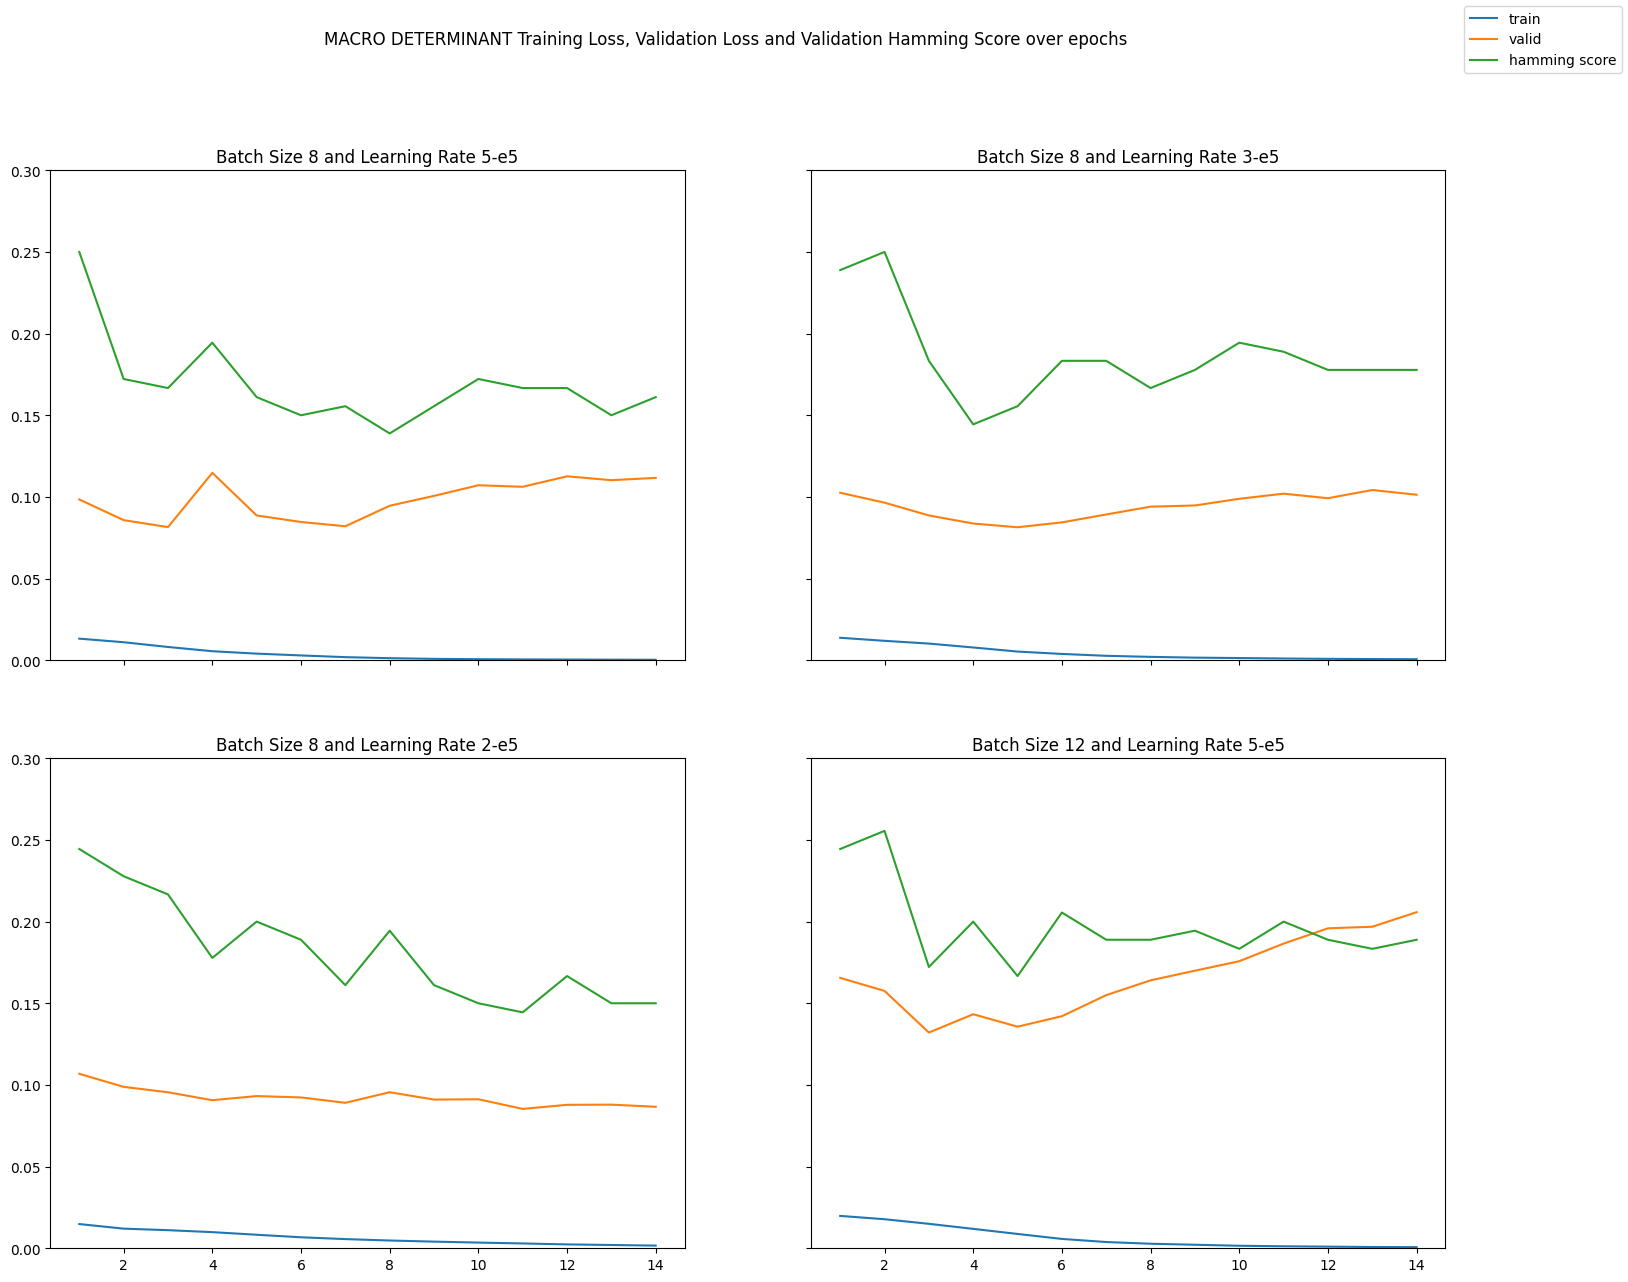

In [1290]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.set_figheight(14)
fig.set_figwidth(18)
fig.suptitle("MACRO DETERMINANT Training Loss, Validation Loss and Validation Hamming Score over epochs")

ax[0, 0].set_ylim(0,0.3)

ax[0, 0].title.set_text("Batch Size 8 and Learning Rate 5-e5")
ax[0, 0].plot(df_model_5_batch_8.index, df_model_5_batch_8["train_loss"], label="train")
ax[0, 0].plot(df_model_5_batch_8.index, df_model_5_batch_8["valid_loss"], label="valid")
ax[0, 0].plot(df_model_5_batch_8.index, df_model_5_batch_8["hamming"], label="hamming score")


ax[0, 1].set_ylim(0,0.3)

ax[0, 1].title.set_text("Batch Size 8 and Learning Rate 3-e5")
ax[0, 1].plot(df_model_3_batch_8.index, df_model_3_batch_8["train_loss"])
ax[0, 1].plot(df_model_3_batch_8.index, df_model_3_batch_8["valid_loss"])
ax[0, 1].plot(df_model_3_batch_8.index, df_model_3_batch_8["hamming"])


ax[1, 0].set_ylim(0,0.3)

ax[1, 0].title.set_text("Batch Size 8 and Learning Rate 2-e5")
ax[1, 0].plot(df_model_2_batch_8.index, df_model_2_batch_8["train_loss"])
ax[1, 0].plot(df_model_2_batch_8.index, df_model_2_batch_8["valid_loss"])
ax[1, 0].plot(df_model_2_batch_8.index, df_model_2_batch_8["hamming"])

ax[1, 1].set_ylim(0,0.3)

ax[1, 1].title.set_text("Batch Size 12 and Learning Rate 5-e5")
ax[1, 1].plot(df_model_5_batch_12.index, df_model_5_batch_12["train_loss"])
ax[1, 1].plot(df_model_5_batch_12.index, df_model_5_batch_12["valid_loss"])
ax[1, 1].plot(df_model_5_batch_12.index, df_model_5_batch_12["hamming"])

fig.legend()
plt.show()

# Initial grid analysis of MACRO CONTENT models

In [1291]:
with open("grid_results_contents_macro.json") as f:
    grids = json.load(f)

grids = grids[-9:]

In [1292]:
list_to_df = grid_dicto_to_df_list(grids)

In [1293]:
df = pd.DataFrame(list_to_df)

In [1294]:
df.columns

Index(['max-len', 'learning_rate', 'batch_size', 'num_train_epochs',
       'n_epochs', 'train_loss_epoch_1', 'valid_loss_epoch_1', 'f1_epoch_1',
       'accuracy_epoch_1', 'roc_auc_epoch_1',
       ...
       'accuracy_epoch_14', 'roc_auc_epoch_14', 'hamming_epoch_14',
       'proba_outputs_epoch_14', 'actual_classes_epoch_14', 'test_loss',
       'test_f1', 'test_roc_auc', 'test_hamming', 'test_accuracy'],
      dtype='object', length=129)

In [1295]:
df.head()

,max-len,learning_rate,batch_size,num_train_epochs,n_epochs,train_loss_epoch_1,valid_loss_epoch_1,f1_epoch_1,accuracy_epoch_1,roc_auc_epoch_1,...,accuracy_epoch_14,roc_auc_epoch_14,hamming_epoch_14,proba_outputs_epoch_14,actual_classes_epoch_14,test_loss,test_f1,test_roc_auc,test_hamming,test_accuracy
0,128,0.00002,8,14,15,0.013434,0.075877,0.086957,0.055556,0.521839,...,0.666667,0.850550,0.047980,"[[[0.9560956358909607, 0.022482305765151978, 0...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.044833,0.739130,0.855142,0.051948,0.619048
1,128,0.00002,12,14,15,0.019257,0.127115,0.000000,0.000000,0.500000,...,0.583333,0.808288,0.050505,"[[[0.9606870412826538, 0.03840835019946098, 0....","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.075901,0.755556,0.857546,0.047619,0.619048
2,128,0.00002,16,14,15,0.027511,0.153129,0.153846,0.111111,0.539429,...,0.555556,0.789578,0.065657,"[[[0.9148823022842407, 0.06423570215702057, 0....","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.098565,0.681818,0.811664,0.060606,0.476190
3,128,0.00003,8,14,15,0.010332,0.060665,0.000000,0.000000,0.500000,...,0.777778,0.891100,0.030303,"[[[0.9746949672698975, 0.015561840496957302, 0...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.038050,0.826087,0.903428,0.034632,0.714286
4,128,0.00003,12,14,15,0.020979,0.132107,0.000000,0.000000,0.500000,...,0.666667,0.841755,0.045455,"[[[0.9690043926239014, 0.017071973532438278, 0...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.065283,0.772727,0.859950,0.043290,0.666667


In [1296]:
df_best = get_best_scores(df)

## Comparing Model performance

In [1297]:
df_best[filter_columns].sort_values(["test_loss"], ascending=True)

,learning_rate,batch_size,test_loss,test_f1,test_hamming,best_train_loss_,best_valid_loss_,best_hamming_,best_f1_,best_accuracy_
6,0.00005,8,0.030832,0.851064,0.030303,0.000889,0.025364,0.030303,0.850000,0.777778
3,0.00003,8,0.038050,0.826087,0.034632,0.001269,0.028542,0.027778,0.860759,0.805556
0,0.00002,8,0.044833,0.739130,0.051948,0.001962,0.030636,0.042929,0.773333,0.666667
7,0.00005,12,0.045474,0.844444,0.030303,0.001572,0.042242,0.035354,0.833333,0.750000
4,0.00003,12,0.065283,0.772727,0.043290,0.002406,0.044004,0.037879,0.810127,0.722222
8,0.00005,16,0.069214,0.755556,0.047619,0.002653,0.058163,0.045455,0.759494,0.722222
1,0.00002,12,0.075901,0.755556,0.047619,0.003683,0.051813,0.047980,0.739726,0.611111
5,0.00003,16,0.084727,0.739130,0.051948,0.004675,0.065976,0.045455,0.763158,0.666667
2,0.00002,16,0.098565,0.681818,0.060606,0.006812,0.072391,0.065657,0.666667,0.555556


## Evaluating hyperparameters

In [1298]:
df_best.pivot_table(["best_train_loss_", "best_valid_loss_"], index = "learning_rate", columns="batch_size")

best_train_loss_                     best_valid_loss_            \
batch_size                  8         12        16               8         12   
learning_rate                                                                   
0.00002               0.001962  0.003683  0.006812         0.030636  0.051813   
0.00003               0.001269  0.002406  0.004675         0.028542  0.044004   
0.00005               0.000889  0.001572  0.002653         0.025364  0.042242   

                         
batch_size           16  
learning_rate            
0.00002        0.072391  
0.00003        0.065976  
0.00005        0.058163

Like in the previous case, the models of batch size 8 and learning rate 5-e5 and 3-e5 seem to be the better ones.

In [1299]:
df_best.pivot_table(["best_train_loss_", "best_valid_loss_", "best_hamming_"], index = "learning_rate", columns="batch_size")

#  Hamming loss is the fraction of labels that are incorrectly predicted

best_hamming_                     best_train_loss_            \
batch_size               8         12        16               8         12   
learning_rate                                                                
0.00002            0.042929  0.047980  0.065657         0.001962  0.003683   
0.00003            0.027778  0.037879  0.045455         0.001269  0.002406   
0.00005            0.030303  0.035354  0.045455         0.000889  0.001572   

                        best_valid_loss_                      
batch_size           16               8         12        16  
learning_rate                                                 
0.00002        0.006812         0.030636  0.051813  0.072391  
0.00003        0.004675         0.028542  0.044004  0.065976  
0.00005        0.002653         0.025364  0.042242  0.058163

## Visualizing the candidate models

In [1300]:
model_3_batch_8 = df.iloc[3]
model_5_batch_8 = df.iloc[6]
model_5_batch_12 = df.iloc[7]

In [1301]:
df_model_5_batch_8 = get_train_val_metric_df(model_5_batch_8)
df_model_3_batch_8 = get_train_val_metric_df(model_3_batch_8)
df_model_5_batch_12 = get_train_val_metric_df(model_5_batch_12)

#### Plots

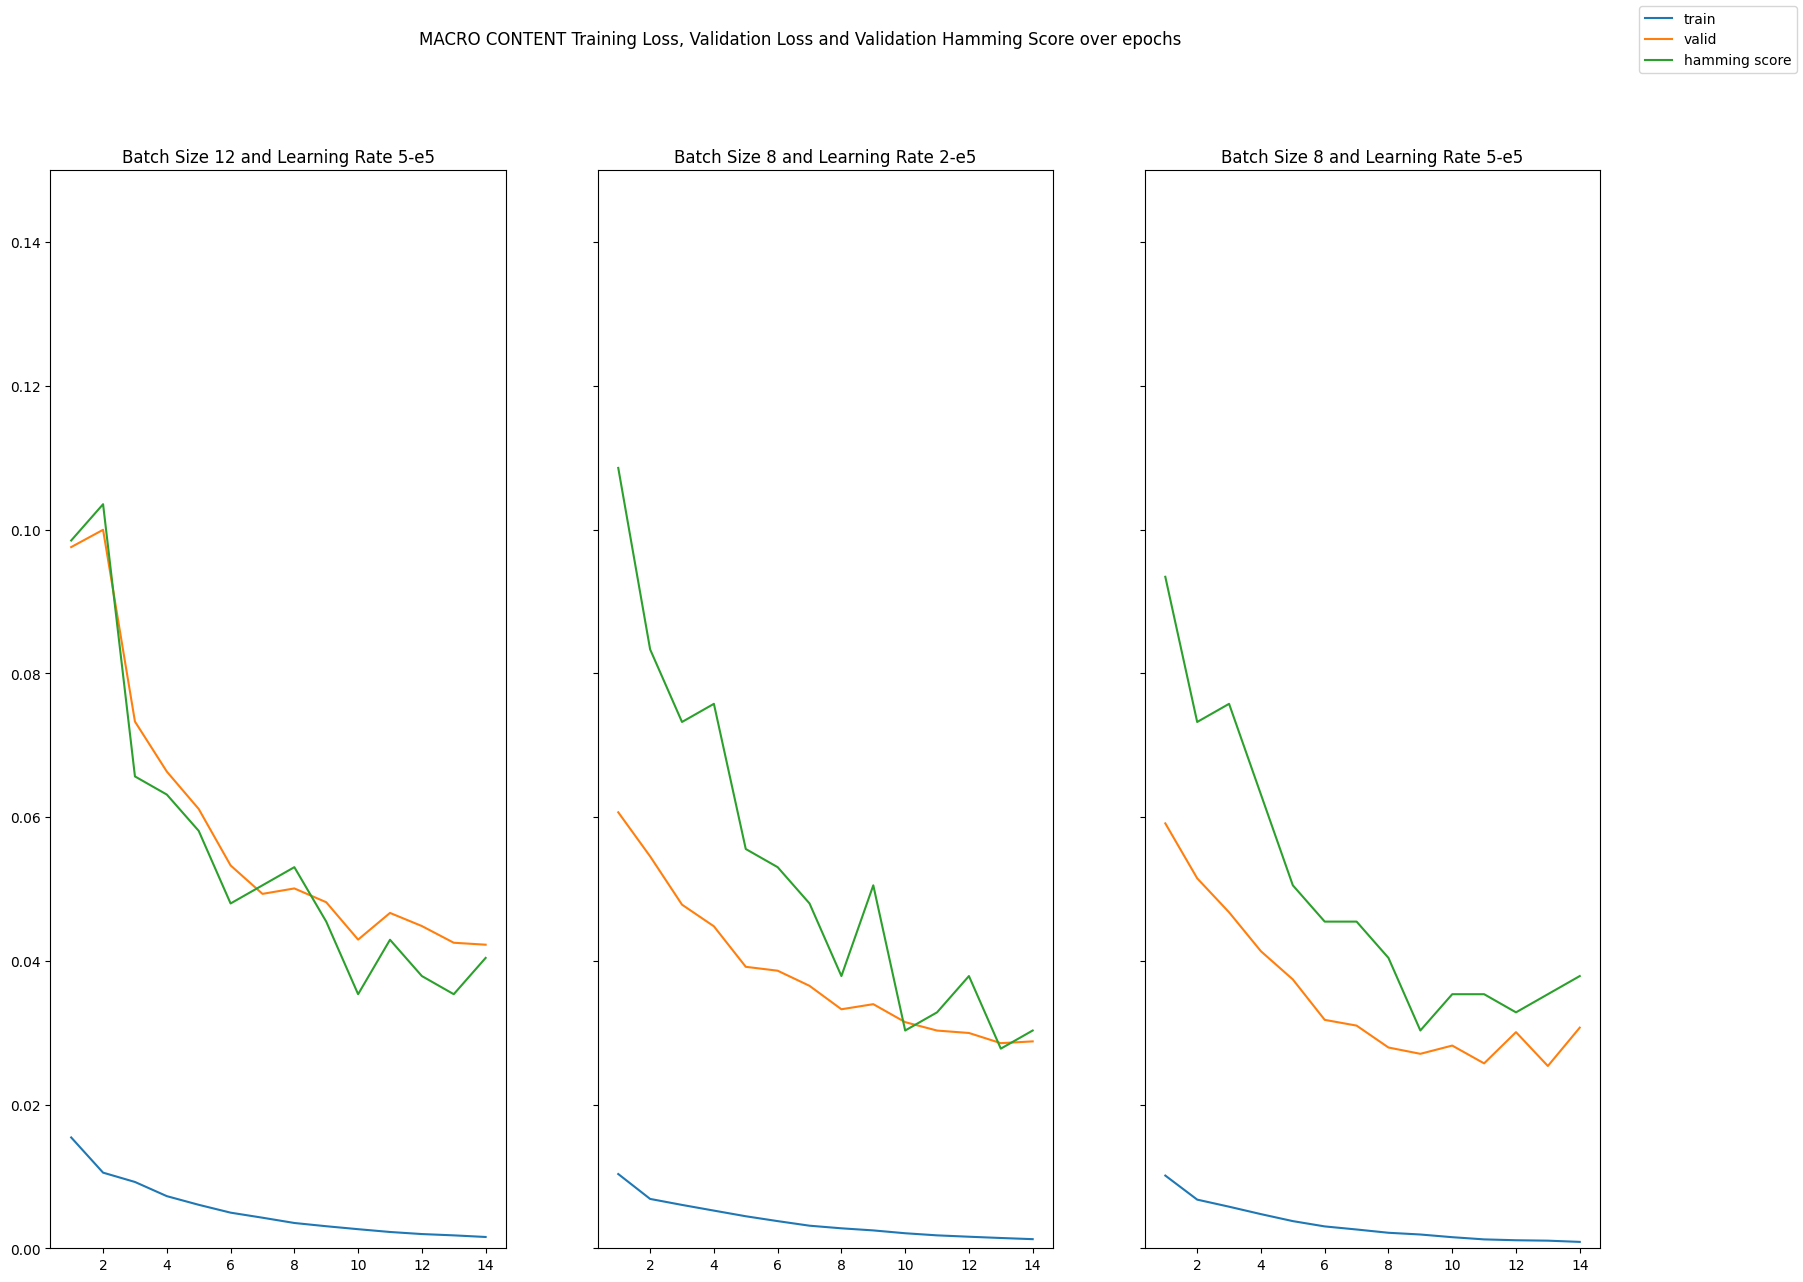

In [1302]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True)
fig.set_figheight(14)
fig.set_figwidth(20)
fig.suptitle("MACRO CONTENT Training Loss, Validation Loss and Validation Hamming Score over epochs")

ax[0].set_ylim(0,0.15)

ax[0].title.set_text("Batch Size 12 and Learning Rate 5-e5")
ax[0].plot(df_model_5_batch_12.index, df_model_5_batch_12["train_loss"], label="train")
ax[0].plot(df_model_5_batch_12.index, df_model_5_batch_12["valid_loss"], label="valid")
ax[0].plot(df_model_5_batch_12.index, df_model_5_batch_12["hamming"], label="hamming score")


ax[2].set_ylim(0,0.15)

ax[2].title.set_text("Batch Size 8 and Learning Rate 5-e5")
ax[2].plot(df_model_5_batch_8.index, df_model_5_batch_8["train_loss"])
ax[2].plot(df_model_5_batch_8.index, df_model_5_batch_8["valid_loss"])
ax[2].plot(df_model_5_batch_8.index, df_model_5_batch_8["hamming"])


ax[1].set_ylim(0,0.15)

ax[1].title.set_text("Batch Size 8 and Learning Rate 2-e5")
ax[1].plot(df_model_3_batch_8.index, df_model_3_batch_8["train_loss"])
ax[1].plot(df_model_3_batch_8.index, df_model_3_batch_8["valid_loss"])
ax[1].plot(df_model_3_batch_8.index, df_model_3_batch_8["hamming"])

fig.legend()
plt.show()

# OLD, KEEPING IN CASE WE NEED IT

In [1303]:
# lr_curves = df.pivot_table(["train_loss", "valid_loss"], ["max-len", "learning_rate", "batch_size"], "epoch")

In [1304]:
# lr_curves

In [1305]:
# lr_curves.iloc[0]["train_loss"]

In [1306]:
# lr_curves.iloc[0]["valid_loss"]

In [1307]:
# candidates = []

# for row, col in lr_curves.iterrows():

#     train_loss_array = col["train_loss"]
#     valid_loss_array = col["valid_loss"]
#     if valid_loss_array[2] < 0.1:
#         candidates.append(row)
#         print("train_loss", train_loss_array)
#         print("valid_loss", valid_loss_array)
#         print(row)
#         epochs = [2, 3, 4, 5, 6, 8]
#         fig, ax = plt.subplots()
#         ax.set_ylim(0,0.2)
#         plt.plot(epochs, train_loss_array, label="train")
#         plt.legend()
#         plt.plot(epochs, valid_loss_array, label="valid")
#         plt.legend()
#         plt.show()
#         # train_loss_array = df.iloc[]["train_loss"]
    

In [1308]:
# candidates

In [1309]:
# df[(df["batch_size"] == 8) & (df["max-len"] == 128) & (df["epoch"] == 8) ]

In [1310]:
# df.sort_values("test_hamming", ascending=True)

In [1311]:
# import seaborn as sns
# import matplotlib.pyplot as plt

In [1312]:
# # df.pivot_table("train_loss", index="batch_size", columns="epoch")
# sns.lineplot(df.pivot_table("train_loss", index="batch_size", columns="learning_rate"))
# plt.show()

In [1313]:
# df.pivot_table("val_f1", index="batch_size", columns="learning_rate")


In [1314]:
# df.pivot_table("train_loss", index="num_train_epochs", columns="batch_size")

The larger the batch size, the more epochs we need

In [1315]:
# df.pivot_table("val_loss", index="num_train_epochs", columns="learning_rate")

The larger the learning_rate, the less epochs we need

In [1316]:
# df.pivot_table("test_f1", index="num_train_epochs", columns="learning_rate")

In [1317]:
# df.pivot_table("val_f1", index="num_train_epochs", columns="learning_rate")

Learning curve plots

dont gridsearch epoch